In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Debate.csv')
df

,user_country,source,content,date
0,NaN,TweetDeck,I will never watch a debate.,2020-09-29T23:59:59+00:00
1,NaN,Twitter for iPhone,Some people have prepared their post debate an...,2020-09-29T23:59:59+00:00
2,"she,her|19| pansexual",Twitter for iPhone,i am not excited for the debate tonight https:...,2020-09-29T23:59:59+00:00
3,"Washington, DC",Twitter Web App,Happy debate night! So weird not to be in the ...,2020-09-29T23:59:59+00:00
4,NaN,Twitter for Android,@pouncereps @cwru Did you know it's possible t...,2020-09-29T23:59:59+00:00
...,...,...,...,...
1995,USA,Twitter Web App,"Dems to Biden: Let POTUS Lie During Debate, Av...",2020-09-29T23:57:07+00:00
1996,"Texas, USA",Twitter for iPhone,@oilyslick1 @BernieSanders Do you know if Twit...,2020-09-29T23:57:07+00:00
1997,"New Jersey, USA 🇺🇸",Twitter for Android,"2. President Obama's Secretary of Defense, who...",2020-09-29T23:57:07+00:00
1998,NaN,Twitter Web App,@realDonaldTrump Tonight! Before the debate j...,2020-09-29T23:57:07+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

47227
['i', 'will', 'never', 'watch', 'a', 'debate.some', 'people', 'have', 'prepared', 'their', 'post', 'debate', 'analysis', ',', 'just', 'few', 'edits', 'with', 'quotes', 'to']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 130.32%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

19711
['never', 'watch', 'debate.some', 'people', 'prepared', 'post', 'debate', 'analysis', 'edits', 'quotes', 'announce', 'winneri', 'excited', 'debate', 'tonight', 'debate', 'night', 'weird', 'newsroom', 'eating']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@joebiden', 93),
 ('@realdonaldtrump', 66),
 ('@cnn', 23),
 ('@youtube', 19),
 ('@truth', 15),
 ('@kamalaharris', 15),
 ('@abc', 14),
 ('@msnbc', 14),
 ('@cillizzacnn', 9),
 ('@ingrahamangle', 9),
 ('@foxnews', 6),
 ('@steveguest', 6),
 ('@jenniferjjacobs', 6),
 ('@donaldjtrumpjr', 6),
 ('@catturd2', 5),
 ('@lionelmedia', 5),
 ('@jorgensen4potus', 4),
 ('@nbcnews', 4),
 ('@', 4),
 ('@preetbharara', 4)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,TweetDeck,I will never watch a debate.,2020-09-29T23:59:59+00:00,Neutral
1,NaN,Twitter for iPhone,Some people have prepared their post debate an...,2020-09-29T23:59:59+00:00,Negative
2,"she,her|19| pansexual",Twitter for iPhone,i am not excited for the debate tonight https:...,2020-09-29T23:59:59+00:00,Negative
3,"Washington, DC",Twitter Web App,Happy debate night! So weird not to be in the ...,2020-09-29T23:59:59+00:00,Positive
4,NaN,Twitter for Android,@pouncereps @cwru Did you know it's possible t...,2020-09-29T23:59:59+00:00,Positive
...,...,...,...,...,...
1995,USA,Twitter Web App,"Dems to Biden: Let POTUS Lie During Debate, Av...",2020-09-29T23:57:07+00:00,Negative
1996,"Texas, USA",Twitter for iPhone,@oilyslick1 @BernieSanders Do you know if Twit...,2020-09-29T23:57:07+00:00,Neutral
1997,"New Jersey, USA 🇺🇸",Twitter for Android,"2. President Obama's Secretary of Defense, who...",2020-09-29T23:57:07+00:00,Negative
1998,NaN,Twitter Web App,@realDonaldTrump Tonight! Before the debate j...,2020-09-29T23:57:07+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    881
Neutral     699
Negative    420
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 44.05%
Percentage of neutral tweets: 34.95%
Percentage of negative tweets: 21.00%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

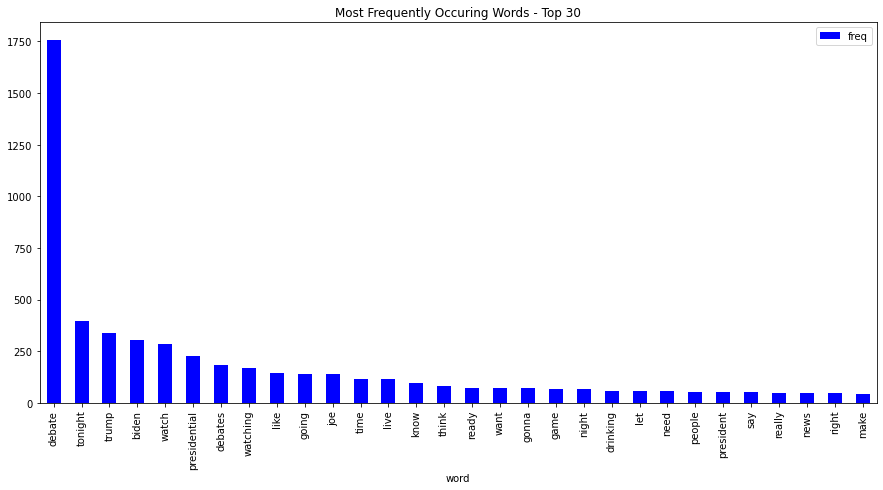

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

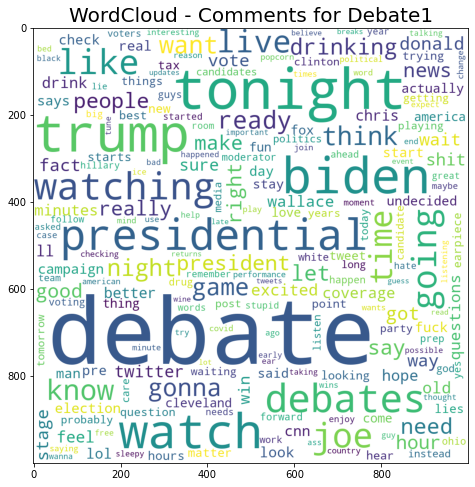

In [64]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

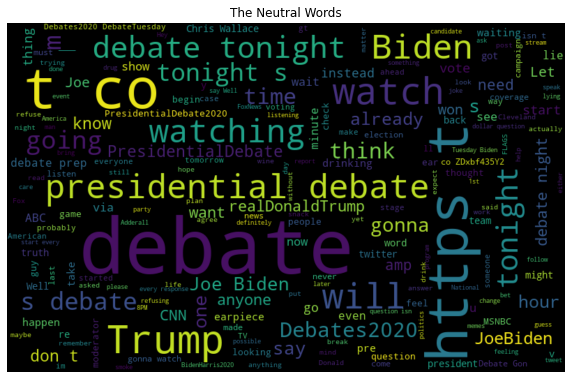

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

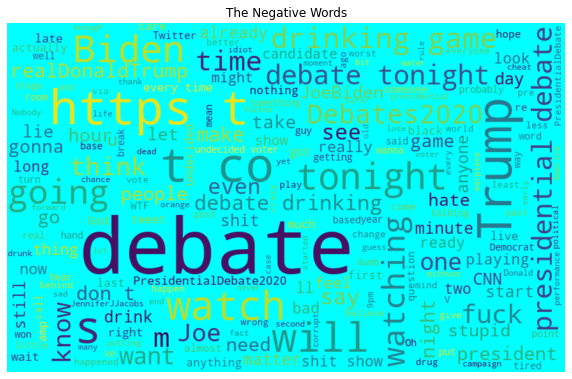

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

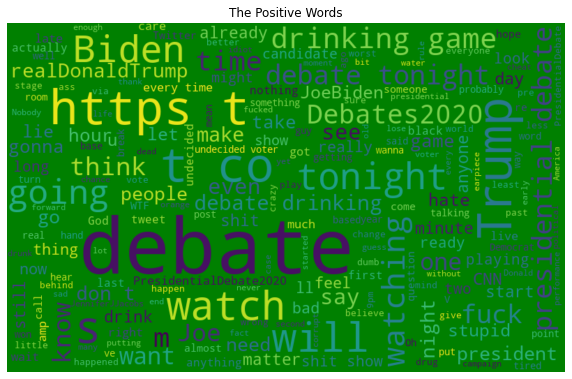

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,I will never watch a debate.,Neutral
1,Some people have prepared their post debate an...,Negative
2,i am not excited for the debate tonight https:...,Negative
3,Happy debate night! So weird not to be in the ...,Positive
4,@pouncereps @cwru Did you know it's possible t...,Positive
...,...,...
1995,"Dems to Biden: Let POTUS Lie During Debate, Av...",Negative
1996,@oilyslick1 @BernieSanders Do you know if Twit...,Neutral
1997,"2. President Obama's Secretary of Defense, who...",Negative
1998,@realDonaldTrump Tonight! Before the debate j...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,i will never watch a debate
1,Negative,some people have prepared their post debate an...
2,Negative,i am not excited for the debate tonight
3,Positive,happy debate night so weird not to be in the n...
4,Positive,did you know it s possible to have an emergenc...
...,...,...
1995,Negative,dems to biden let potus lie during debate avoi...
1996,Neutral,do you know if twitter is gonna carry the debate
1997,Negative,president obama s secretary of defense who ser...
1998,Positive,tonight before the debate join ex military int...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
3,Positive,happy debate night so weird not to be in the n...
4,Positive,did you know it s possible to have an emergenc...
11,Positive,to be clear i am civically engaged i also have...
12,Positive,anyone else treating the debate tonight like t...
14,Positive,chris wallace says he wants to be invisible as...
...,...,...
1988,Negative,my god the ridiculous punditry on right had to...
1990,Negative,this is how incompetent the whole trump bunch ...
1994,Negative,debate night live tweets so i can vent somewhe...
1995,Negative,dems to biden let potus lie during debate avoi...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
3,1,happy debate night so weird not to be in the n...
4,1,did you know it s possible to have an emergenc...
11,1,to be clear i am civically engaged i also have...
12,1,anyone else treating the debate tonight like t...
14,1,chris wallace says he wants to be invisible as...
...,...,...
1988,0,my god the ridiculous punditry on right had to...
1990,0,this is how incompetent the whole trump bunch ...
1994,0,debate night live tweets so i can vent somewhe...
1995,0,dems to biden let potus lie during debate avoi...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(975, 2)
(326, 2)


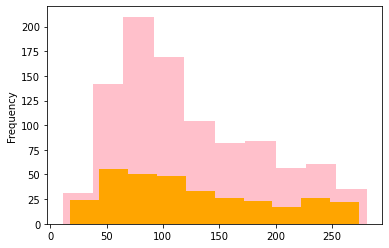

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(276255, 454520)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('biden', 0.8455531001091003),
 ('vp', 0.8286586999893188),
 ('hair', 0.8243066668510437),
 ('joe', 0.8163501024246216),
 ('donald', 0.8121315240859985),
 ('former', 0.8065324425697327),
 ('nominee', 0.806441068649292),
 ('j', 0.8049290180206299),
 ('running', 0.8019726276397705),
 ('republican', 0.7993395328521729)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('abnormal', -0.3488284647464752),
 ('via', -0.4024505317211151),
 ('man', -0.4033929705619812),
 ('white', -0.4335384964942932),
 ('fact', -0.43829014897346497),
 ('news', -0.4628952145576477),
 ('hour', -0.4694523811340332),
 ('vs', -0.4747576415538788),
 ('there', -0.4792789816856384),
 ('by', -0.47998952865600586)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(975, 500)
(975,)
(326, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5061349693251533
F1 score : 0.5636856368563685
[[ 61  40]
 [121 104]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989743589743589
Validation Accuracy : 0.4601226993865031
f1 score : 0.5686274509803921
[[ 34  67]
 [109 116]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.38650306748466257
f1 score : 0.38271604938271603
[[ 64  37]
 [163  62]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9282051282051282
Validation Accuracy : 0.6748466257668712
f1 score : 0.8037037037037037
[[  3  98]
 [  8 217]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 terrence you re just lashing out we have a bet going up here in canada that joe s going to shit his pants during the debate do you want in 

First sample after preprocessing: 
 [ 12  75  34  59  39  31   6  48  42 101  11  17  44   7  48   3 141  51
  91   1   2  55  12 102  11   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6601 - accuracy: 0.6100 - val_loss: 0.6188 - val_accuracy: 0.7041
Epoch 2/20
7/7 - 1s - loss: 0.6380 - accuracy: 0.6693 - val_loss: 0.6155 - val_accuracy: 0.7041
Epoch 3/20
7/7 - 1s - loss: 0.6307 - accuracy: 0.6693 - val_loss: 0.6224 - val_accuracy: 0.7041
Epoch 4/20
7/7 - 1s - loss: 0.6275 - accuracy: 0.6693 - val_loss: 0.6117 - val_accuracy: 0.7041
Epoch 5/20
7/7 - 1s - loss: 0.6181 - accuracy: 0.6693 - val_loss: 0.6008 - val_accuracy: 0.7041
Epoch 6/20
7/7 - 1s - loss: 0.6048 - accuracy: 0.6693 - val_loss: 0.5869 - val_accuracy: 0.7041
Epoch 7/20
7/7 - 1s - loss: 0.5773 - accuracy: 0.6693 - val_loss: 0.5575 - val_accuracy: 0.7041
Epoch 8/20
7/7 - 1s - loss: 0.5334 - accuracy: 0.6705 - val_loss: 0.5224 - val_accuracy: 0.7143
Epoch 9/20
7/7 - 1s - loss: 0.4807 - accuracy: 0.7218 - val_loss: 0.4855 - val_accuracy: 0.7449
Epoch 10/20
7/7 - 1s - loss: 0.4216 - accuracy: 0.8096 - val_loss: 0.4700 - val_accuracy: 0.7959
Epoch 11/20
7/7 - 1s - loss: 0.3701 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,i will never watch a debate
1,0,some people have prepared their post debate an...
2,0,i am not excited for the debate tonight
3,1,happy debate night so weird not to be in the n...
4,1,did you know it s possible to have an emergenc...
...,...,...
1995,0,dems to biden let potus lie during debate avoi...
1996,-1,do you know if twitter is gonna carry the debate
1997,0,president obama s secretary of defense who ser...
1998,1,tonight before the debate join ex military int...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.444
F1 score : [0.50753769 0.1595092  0.49202733]
[[101  17  62]
 [ 38  13  62]
 [ 79  20 108]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.916
Validation Accuracy : 0.45
f1 score : [0.51351351 0.23474178 0.50359712]
[[ 95  32  53]
 [ 36  25  52]
 [ 59  43 105]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.424
f1 score : [0.4957265  0.12716763 0.4789916 ]
[[ 87  14  79]
 [ 26  11  76]
 [ 58  35 114]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8613333333333333
Validation Accuracy : 0.51
f1 score : [0.56544503 0.0173913  0.5805169 ]
[[108   0  72]
 [ 34   1  78]
 [ 60   1 146]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['wow absolutely has the best debate coverage', 'we re watching the debate and voting for you for president', 'why time is going by so slow waiting for the debate to start', 'this household will be watching the debate tonight voteblue best of luck to our future president we know you will put numnutz in his place', 'a debate in which two creepy sociopaths will argue over who will best serve the interests of suicidal ecocidal genocidal big pharma big agriculture and the military industrial complex i m good thanks debates', 'watching the debate is fine can we please not have to hear the media bs prior to it', 'just finished a hour marathon with my monk in ffxiv have to re orientate myself to the time stream hours until debate oh kay i m good', 'how do i watch the yankee game and the debate at the same time', 'post debate', 'energy financials pull stocks down ahead of biden trump debate fb', 'ahhh no audience this will be a great debate', 'the debate st

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.5068 - accuracy: 0.2089 - val_loss: 0.2769 - val_accuracy: 0.2067
Epoch 2/20
11/11 - 2s - loss: 0.3695 - accuracy: 0.2044 - val_loss: 0.2176 - val_accuracy: 0.2067
Epoch 3/20
11/11 - 2s - loss: 0.3346 - accuracy: 0.2044 - val_loss: 0.2665 - val_accuracy: 0.2067
Epoch 4/20
11/11 - 2s - loss: 0.3285 - accuracy: 0.2044 - val_loss: 0.2307 - val_accuracy: 0.2067
Epoch 5/20
11/11 - 2s - loss: 0.2884 - accuracy: 0.2044 - val_loss: 0.1497 - val_accuracy: 0.2067
Epoch 6/20
11/11 - 2s - loss: 0.1542 - accuracy: 0.2044 - val_loss: 0.0250 - val_accuracy: 0.2067
Epoch 7/20
11/11 - 2s - loss: -2.0635e-01 - accuracy: 0.2104 - val_loss: -4.1588e-01 - val_accuracy: 0.2600
Epoch 8/20
11/11 - 2s - loss: -1.1512e+00 - accuracy: 0.2519 - val_loss: -1.5663e+00 - val_accuracy: 0.3000
Epoch 9/20
11/11 - 2s - loss: -3.4140e+00 - accuracy: 0.3096 - val_loss: -4.1872e+00 - val_accuracy: 0.3067
Epoch 10/20
11/11 - 2s - loss: -8.1867e+00 - accuracy: 0.3163 - val_loss: -9.9326e+00 - 